<a href="https://colab.research.google.com/github/rahulhirur/DLLab/blob/main/Assignment_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neptune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67675 sha256=21a60eb56efadd1c18abdf9cd95967de8e5eeb398eb1c7bccf3990a01accc2a8
  Stored in directory: /root/.cache/pip/wheels/42/35/4a/44ec4c358db21a5d63ed4e40f0f0012a438106f220bce4ccba
Successfully built bravado-core


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from math import floor
import neptune
import time
from tqdm import tqdm

In [ ]:
#Save neptune File

run = neptune.init_run(
    project="rahulhirur/DL-Lab2-CNN",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxMjkzM2M3My02ZWQ3LTQ4MjUtYTc2Zi03ODg3OWI4NDU3MGEifQ==",
)


[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/rahulhirur/DL-Lab2-CNN/e/DLLAB-1


In [ ]:
#parameter setup
seed = 42
batch_size = 32
learning_rate = 0.01
n_epochs = 4
dropOutRate = 0.25
kernel_size = 3
padding = 1
stride = 1
optimizer= "SGD"
loss_fn = "CrossEntropyLoss"

params = {
    "seed": seed,
    "batch_size": batch_size,
    "learning_rate": learning_rate,
    "n_epochs": n_epochs,
    "dropOutRate": dropOutRate,
    "kernel_size": kernel_size,
    "padding": padding,
    "stride": stride,
    "optimizer": optimizer,
    "loss_fn": loss_fn
}

run["parameters"] = params

**Task 1**

In [ ]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
print(torch.randint(1, 10, (1, 1)))

tensor([[7]])


**Task 2**

In [ ]:
# Load CIFAR-10 dataset
train_set_raw = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set_raw = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
validation_set_raw, test_set_raw = torch.utils.data.random_split(test_set_raw, [0.8, 0.2])


100%|██████████| 170M/170M [00:02<00:00, 65.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Define CIFAR-10 classes
classes = train_set_raw.classes
print(f"The number of classes in the dataset - {len(classes)}")

print(f"The number of images in the training dataset - {len(train_set_raw)}")
print(f"The number of images in the test dataset - {len(test_set_raw)}")
print(f"The number of images in the validation dataset - {len(validation_set_raw)}")

The number of classes in the dataset - 10
The number of images in the training dataset - 50000
The number of images in the test dataset - 2000
The number of images in the validation dataset - 8000


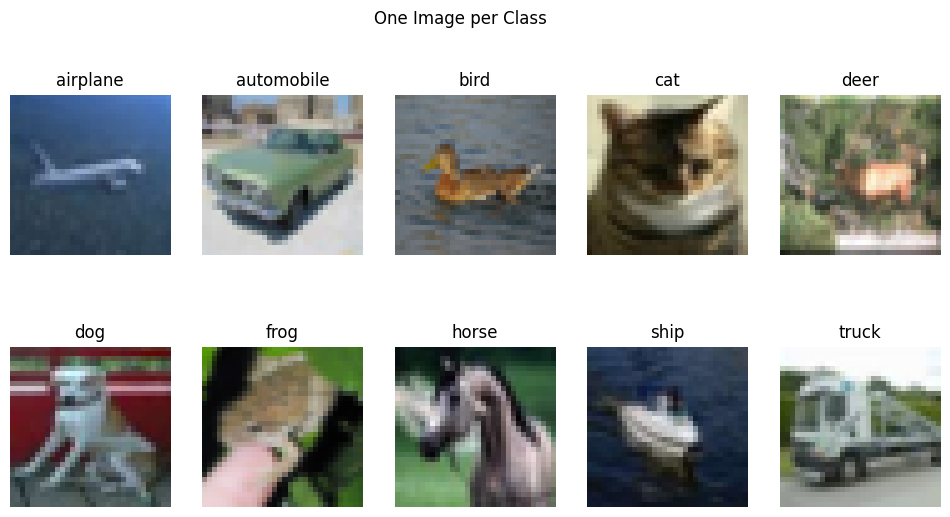

In [ ]:
def show_images_per_class(dataset, classes):
    class_examples = {class_name: None for class_name in classes}

    for image, label in dataset:
        class_name = classes[label]
        if class_examples[class_name] is None:
            class_examples[class_name] = image
        if all(v is not None for v in class_examples.values()):  # Break when all classes are filled
            break

    # Plot images
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle('One Image per Class')
    for idx, (class_name, img) in enumerate(class_examples.items()):
        ax = axes[idx // 5, idx % 5]
        img = np.transpose(img, (1, 2, 0))

        ax.imshow(img)
        ax.set_title(class_name)
        ax.axis('off')
    plt.show()

# Call the function with the transformed dataset
show_images_per_class(validation_set_raw, classes)

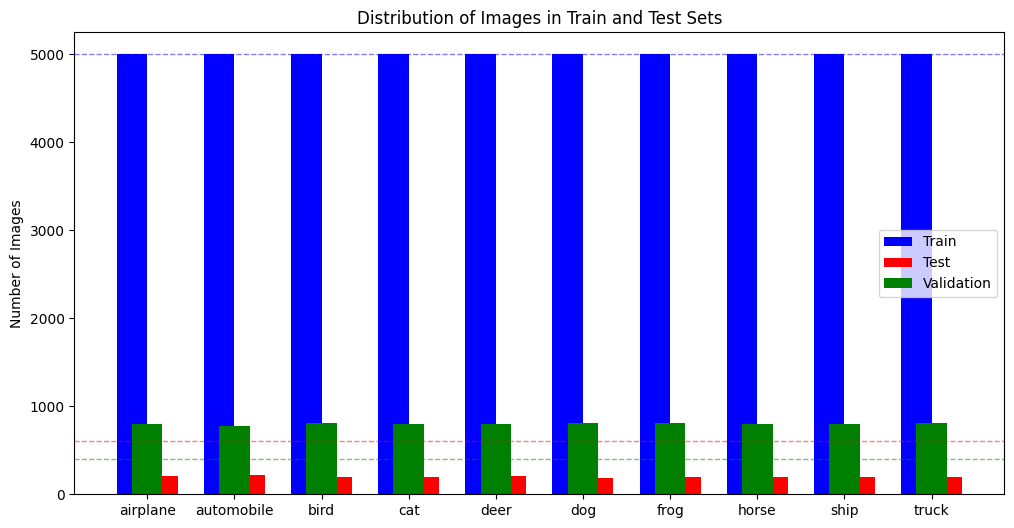

In [ ]:
def plot_combined_histogram(train_dataset, test_dataset, val_dataset, classes):
    train_class_counts = {}
    test_class_counts = {}
    val_class_counts = {}

    for label in range(len(classes)):
      train_class_counts[label] = 0
      test_class_counts[label] = 0
      val_class_counts[label] = 0

    for _, label in train_dataset:
      train_class_counts[label] = train_class_counts[label] + 1

    for _, label in test_dataset:
        test_class_counts[label] = test_class_counts[label] + 1

    for _, label in val_dataset:
        val_class_counts[label] = val_class_counts[label] + 1

    x = np.arange(len(classes))

    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    rects1 = ax.bar(x - width/2, [train_class_counts.get(i,0) for i in range(len(classes))], width, label='Train',color="blue")
    ax.axhline(y=5000, color='blue', linestyle='--',linewidth=1,alpha=0.5)

    rects2 = ax.bar(x + width/2, [test_class_counts.get(i,0) for i in range(len(classes))], width, label='Test',color="red")
    ax.axhline(y=600, color='red', linestyle='--',linewidth=1,alpha=0.5)

    rects3 = ax.bar(x, [val_class_counts.get(i,0) for i in range(len(classes))], width, label='Validation',color="green")
    ax.axhline(y=400, color='green', linestyle='--',linewidth=1,alpha=0.5)

    ax.set_ylabel('Number of Images')
    ax.set_title('Distribution of Images in Train and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    plt.show()

plot_combined_histogram(train_set_raw, test_set_raw, validation_set_raw, classes)

In [ ]:
def get_mean_std(dataset):
  # get the mean and std of the whole dataset
  images, _ = next(iter(dataset))
  print(images.mean(),  images.std())
  return images.mean().numpy(),  images.std().numpy()


In [ ]:
meanVal, stdVal= get_mean_std(train_set_raw)


tensor(0.4057) tensor(0.2039)


In [ ]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=meanVal, std=stdVal)
    ])

# Create a function to apply transformations on-demand
def apply_transform(dataset, transform):
    dataset.transform = transform
    return dataset

# Apply transformations to the dataset needed
# train_set_transformed = apply_transform(train_set_raw, transform)
# test_set_transformed = apply_transform(test_set_raw, transform)
# validation_set_transformed = apply_transform(validation_set_raw, transform)

train_set_transformed = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
test_set_transformed = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms)

validation_set_transformed, test_set_transformed = torch.utils.data.random_split(test_set_transformed, [0.8, 0.2])

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
get_mean_std(train_set_transformed)

tensor(4.3462e-09) tensor(1.)


(array(4.346172e-09, dtype=float32), array(1., dtype=float32))

In [ ]:
# Create loaders

train_loader = torch.utils.data.DataLoader(train_set_transformed, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set_transformed, batch_size=len(test_set_transformed), shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set_transformed, batch_size=len(validation_set_transformed), shuffle=True, num_workers=2)

Task3

In [ ]:
# prompt:  Assume you have downloaded the dataset using the variable
# dataset train. Are the entries in the correct type for the DL framework in PyTorch? How can you arrive at a suitable format for your training pipeline? Answer this question by also providing clarification about
# (i) The type of each element of the dataset
# (ii) How we can convert it to a suitable type. Hint: have a look at the
# slides
# (iii) The dimension of the image as a torch.Tensor object
# (iv) The meaning of each dimension of the images

# (i) Type of each element
# The dataset consists of PIL images and integer labels.  PIL images are not directly usable
# as tensors in PyTorch.  The labels are integers representing the class of the image.

# (ii) Conversion to a suitable type
# The provided code already converts the dataset to the correct format using torchvision.transforms.Compose:

# transforms.ToTensor(): Converts a PIL Image or numpy.ndarray to a float tensor
# The pixel values are converted from [0, 255] to [0.0, 1.0].
# transforms.Normalize(): Normalizes the tensor image with mean and standard deviation.
# This is crucial for good performance in many neural networks.

# The apply_transform function applies these transformations.  The key is the use of transforms.ToTensor().

# (iii) Dimension of the image as a torch.Tensor
# After applying the transformation, each image in the dataset will be a torch.Tensor with dimensions (3, 32, 32).

# (iv) Meaning of each dimension
# - Dimension 0 (3): Represents the color channels (Red, Green, Blue).
# - Dimension 1 (32): Represents the height of the image in pixels.
# - Dimension 2 (32): Represents the width of the image in pixels.


# Example to demonstrate the dimensions

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"Image shape: {images.shape}") # Output: torch.Size([4, 3, 32, 32])  (batch_size, channels, height, width)
print(f"Image shape in the batch: {images[0].shape}") # Output: torch.Size([3, 32, 32])
print(f"Label shape: {labels.shape}") # Output: torch.Size([4])
print(type(images))

Image shape: torch.Size([32, 3, 32, 32])
Image shape in the batch: torch.Size([3, 32, 32])
Label shape: torch.Size([32])
<class 'torch.Tensor'>


**Model**

In [ ]:
def out_dimensions(conv_layer, h_in, w_in):
    '''
    This function computes the output dimension of each convolutional layers in the most general way.
    '''
    h_out = floor((h_in + 2 * conv_layer.padding[0] - conv_layer.dilation[0] * (conv_layer.kernel_size[0] - 1) - 1) /
                  conv_layer.stride[0] + 1)
    w_out = floor((w_in + 2 * conv_layer.padding[1] - conv_layer.dilation[1] * (conv_layer.kernel_size[1] - 1) - 1) /
                  conv_layer.stride[1] + 1)

    return h_out, w_out

# You can start by modifyng what we have done in class, or define your model from scratch

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding = 1, stride=1)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding = 1, stride=1)

        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding = 1, stride=1)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding = 1, stride=1)

        self.pool2 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 8 * 8, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):

        x = self.conv1(x)

        x = self.conv2(x)

        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)

        x = self.conv4(x)

        x = F.relu(x)

        x = self.pool1(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x




In [ ]:
class CNN2(nn.Module):
    def __init__(self, kernel_size, padding, stride, dropoutRate):
        super(CNN2, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=kernel_size, padding = padding, stride=stride)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=kernel_size, padding = padding, stride=stride)

        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=kernel_size, padding = padding, stride=stride)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=kernel_size, padding = padding, stride=stride)

        self.pool2 = nn.MaxPool2d(2, 2)

        #add drop out
        self.dropout = nn.Dropout(dropoutRate)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 8 * 8, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):

        x = self.conv1(x)

        x = self.conv2(x)

        x = F.relu(x)
        x= self.dropout(x)

        x = self.pool1(x)

        x = self.conv3(x)

        x = self.conv4(x)

        x = F.relu(x)
        x= self.dropout(x)

        x = self.pool1(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


In [ ]:

model = CNN2(kernel_size, padding, stride, dropOutRate)


optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()



train_loss_list = []
validation_loss_list = []
for epoch in range(n_epochs):
    loss_train = 0
    acc_train = 0
    epoch_start_time = time.time()
    for data, target in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs} Training", unit="batch"):
        # Set the model in training mode
        model.train()
        # Set the gradient to 0
        optimizer.zero_grad()
        # Make a prediction
        output = model(data)
        # Compute the loss function
        loss = loss_fn(output, target)
        loss_train += loss.item()
        # calculate training accuracy
        _, predicted = torch.max(output.data, 1)
        total = target.size(0)
        correct = (predicted == target).sum().item()
        acc_train += 100 * correct / total

        # Backpropagation
        loss.backward()
        # Update parameters
        optimizer.step()
    loss_train = loss_train / len(train_loader) # Consider this alternative method of tracking training loss.
    acc_train = acc_train / len(train_loader)
    train_loss_list.append(loss_train)
    # Add loss to the neptune data
    run["train/loss"].append(loss_train)
    run["train/accuracy"].append(acc_train)

    # Add the epoch number running
    run["epoch/number"].append(epoch + 1)


    # At the end of every epoch, check the validation loss value
    with torch.no_grad():
        model.eval()
        epoch_end_time = time.time()  # End time for the current epoch
        epoch_time = epoch_end_time - epoch_start_time
        for data, target in validation_loader:
            # Make a prediction
            output = model(data)
            # Compute the loss function
            validation_loss = loss_fn(output, target).item()

            validation_loss_list.append(validation_loss)

            # Add loss to the neptune data
            run["validation/loss"].append(validation_loss)

            #calculate accuracy
            _, predicted = torch.max(output.data, 1)
            total = target.size(0)
            correct = (predicted == target).sum().item()
            accuracy = 100 * correct / total
            # Add validation accuracy to neptune data
            run["validation/accuracy"].append(accuracy)

            print(f"Epoch {epoch + 1}: Train loss: {loss_train}, Validation loss {validation_loss}, Time: {epoch_time:.4f} seconds , Training Accuracy: {acc_train:.2f}%, Validation Accuracy: {accuracy:.2f}%")

            # Calculate epoch time
            run["epoch/time"].append(epoch_time)



run.stop()
print('Training Done')

Epoch 1/4 Training: 100%|██████████| 1563/1563 [05:02<00:00,  5.16batch/s]


Epoch 1: Train loss: 1.7952193459561445, Validation loss 1.5270782709121704, Time: 302.7061 seconds, Accuracy: 49.42%


Epoch 2/4 Training: 100%|██████████| 1563/1563 [05:01<00:00,  5.18batch/s]


Epoch 2: Train loss: 1.3258925435334081, Validation loss 1.3372756242752075, Time: 301.7218 seconds, Accuracy: 51.96%


Epoch 3/4 Training: 100%|██████████| 1563/1563 [05:08<00:00,  5.06batch/s]


Epoch 3: Train loss: 1.1133205921926028, Validation loss 1.1280349493026733, Time: 308.6452 seconds, Accuracy: 62.73%


Epoch 4/4 Training: 100%|██████████| 1563/1563 [05:00<00:00,  5.21batch/s]


Epoch 4: Train loss: 0.9543164555300373, Validation loss 1.007944107055664, Time: 300.2794 seconds, Accuracy: 65.56%
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/rahulhirur/DL-Lab2-CNN/e/DLLAB-1/metadata
Training Done


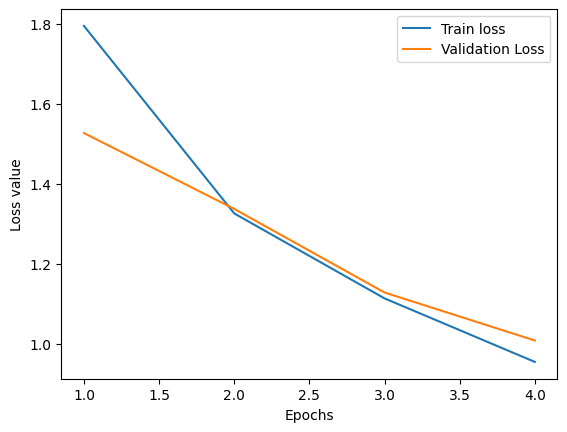

In [ ]:
plt.figure()
plt.plot(range(1,n_epochs+1), train_loss_list)
plt.plot(range(1,n_epochs+1), validation_loss_list)
plt.legend(["Train loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.show()

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for data, target in test_loader:
        model.eval()
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()

    acc = 100.0 * n_correct / n_samples
print("Accuracy on the test set:", acc, "%")

Accuracy on the test set: 63.5 %
